**THIS NOTEBOOK CONTAINS FORECAST FOR SELLERS 2 FROM INVOICE DATA SELLER 11 FROM SALES RECEIPT DATA BY VAR AND VARMAX MODELS BOTH.**

In [44]:
#Importing the prerequisite libraries that are to be used further.
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib.pyplot as plt

**Importing sells receipt and invoices data.**

In [45]:
sales=pd.read_csv("sales_receipt.csv")
invoice=pd.read_csv("inv_transdt_transamt_selrid.csv")

**Cleaning the data by removing the na values.**

In [46]:
invoice=invoice.dropna()

**Getting the Transaction dates into proper format.**

In [47]:
sales["TransactionDate"]=pd.to_datetime(pd.to_datetime(sales.TransactionDate).dt.date)
invoice["TransactionDate"]=pd.to_datetime(pd.to_datetime(invoice.TransactionDate).dt.date)

**Extracting required columns from dataframes.**

In [48]:
sales_fin=sales[["TransactionDate","SellerId", "Amount"]]
invoice_fin=invoice[["TransactionDate","SellerId", "Trans_amount"]]

<font color="red"> **VAR MODEL FOR SELLER 2 FROM INVOICE DATA**</font>

**Preparing the time series for further operations.**

In [49]:
data=invoice_fin[invoice_fin["SellerId"]==2][["TransactionDate","Trans_amount"]]
data=data.set_index("TransactionDate")
data=data.groupby(pd.Grouper(freq="M")).sum()
ts=data["Trans_amount"]
ts=ts.apply(lambda x: int(x))

In [50]:
len(ts)

43

**Have a look on count.**

In [51]:
invoice_fin.groupby("SellerId").count()

,TransactionDate,Trans_amount
SellerId,,
1,8,8
2,631,631
3,97,97
5,1790,1790
6,32,32
9,2898,2898
10,20803,20803
11,4118,4118
12,7946,7946


**Importing libraries for application of VAR(Vector Auto Regression)**

In [52]:
from statsmodels.tsa.vector_ar.var_model import VAR
import random
random.seed(20)

**Below is creating the dataset in the required format for model.**

In [53]:
data = list()
for i in ts:
    v1 = i + random.random()
    v2 = v1 + random.random()
    row = [v1, v2]
    data.append(row)

**Checking for a range of split ratio of the data.**

In [54]:
def converter(pick):
    out=[]
    for i in pick:
        out.append(np.mean(i))
    return pd.Series(out)

**Below code contains building of models corresponding to different train test ratios and corresponding rmse value.**

In [55]:
ratio=[]
rmse=[]
for k in np.arange(0.7,0.95,0.005):
    train = data[:int(k*(len(data)))]
    valid = data[int(k*(len(data))):]
    model = VAR(endog=train)
    model_fit = model.fit()
    yhat= model_fit.forecast(model_fit.y, steps=len(valid))
    train=converter(train)
    valid=converter(valid)
    pred=converter(yhat)
    rmse.append(np.sqrt(np.mean((valid-pred)**2)))
    ratio.append(k)

**Ratio is the fraction of time series in the train data.**

In [56]:
ratio_rmse=pd.DataFrame()
ratio_rmse["ratio"]=ratio
ratio_rmse["rmse"]=rmse

In [57]:
ratio_rmse

,ratio,rmse
0,0.700,6.371172e+06
1,0.705,6.371172e+06
2,0.710,6.371172e+06
3,0.715,6.371172e+06
4,0.720,6.371172e+06
5,0.725,9.706951e+06
6,0.730,9.706951e+06
7,0.735,9.706951e+06
8,0.740,9.706951e+06
9,0.745,8.520505e+06


**Above dataframe contains the rmse(Root Mean Squared Error) at different ratios**

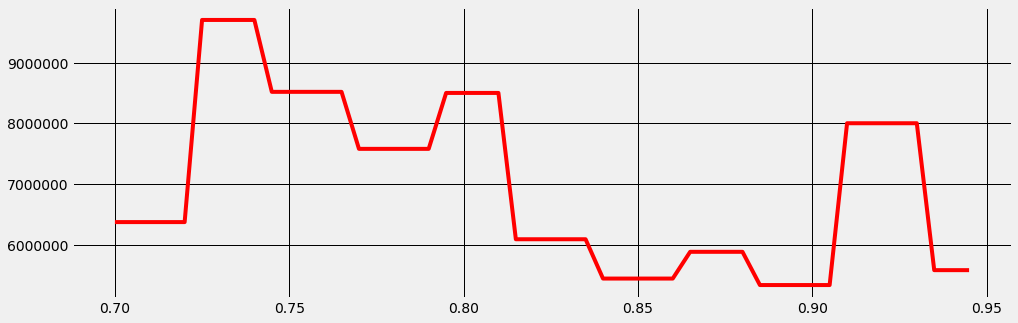

In [58]:
plt.figure(figsize=(15,5))
plt.plot(ratio_rmse.ratio, ratio_rmse.rmse, color="red")
plt.grid(True, color="black")
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

**Above plot shows the variation of rmse with the ratio. It can be inferred easily that the preferred value of split ratio is around 0.9**

**Getting the proper data at that ratio.**

In [59]:
train = data[:int(0.9*(len(data)))]
valid = data[int(0.9*(len(data))):]

**Applying the VAR model**

In [60]:
model = VAR(endog=train)
model_fit = model.fit()

**Below is the forecast for the validation set.**

In [61]:
yhat= model_fit.forecast(model_fit.y, steps=len(valid))

In [62]:
model_fit.aic

29.398257714950464

In [63]:
model_fit.bic

29.65948764673061

**This function converts an array output into a series by taking mean of rows.**

In [64]:
def converter(pick):
    out=[]
    for i in pick:
        out.append(np.mean(i))
    return pd.Series(out)

**Converting the array data into series.**

In [65]:
train=converter(train)
valid=converter(valid)
pred=converter(yhat)

**Converting the output into dataframes.**

In [66]:
def val(valid):
    valid_df=pd.DataFrame()
    valid_df["Amount"]=valid
    valid_df["TransactionDate"]=ts[int(0.9*len(ts)):].index
    valid_df=valid_df.set_index("TransactionDate")
    valid_df=valid_df["Amount"]
    return valid_df
valid_df=val(valid)

In [67]:
def trai(train):
    train_df=pd.DataFrame()
    train_df["Amount"]=train
    train_df["TransactionDate"]=ts[:int(0.9*len(ts))].index
    train_df=train_df.set_index("TransactionDate")
    train_df=train_df["Amount"]
    return train_df
train_df=trai(train)

In [68]:
def pr(pred):
    pred_df=pd.DataFrame()
    pred_df["Amount"]=pred
    pred_df["TransactionDate"]=valid_df.index
    pred_df=pred_df.set_index("TransactionDate")
    pred_df=pred_df["Amount"]
    return pred_df
pred_df=pr(pred)

**Below function connects the gap between the training set and the prediction set.**

In [69]:
def pred_fin(predicted, train):
    c=pd.Index(predicted.index)
    c=c.insert(0, pd.to_datetime(train.index[-1]))
    lis=list(predicted.values)
    lis.insert(0,train[-1])
    lis=pd.Series(lis,index=c)
    prediction_final=lis.apply(lambda x:int(x))
    return prediction_final

**This is the final prediction.**

In [70]:
pred_df=pred_fin(pred_df, train_df)
valid_df=pred_fin(valid_df, train_df)

In [71]:
train_df.tail()

TransactionDate
2018-10-31    1.747043e+07
2018-11-30    1.022596e+07
2018-12-31    5.996826e+06
2019-01-31    8.353078e+06
2019-02-28    6.672950e+06
Name: Amount, dtype: float64

In [72]:
valid_df.head()

TransactionDate
2019-02-28     6672950
2019-03-31    11059775
2019-04-30     7363200
2019-05-31    16733469
2019-06-30    13965581
dtype: int64

**Below plot shows the performance of VAR Model on validation dataset.**

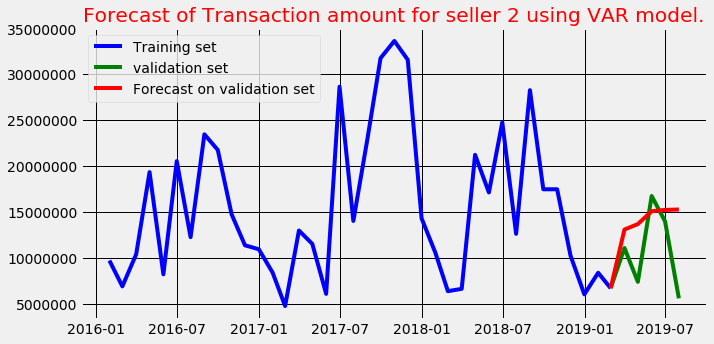

In [73]:
plt.figure(figsize=(10,5))
plt.plot(train_df, color="blue", label="Training set")
plt.plot(valid_df, color="green", label="validation set")
plt.plot(pred_df, color="red", label= "Forecast on validation set")
plt.grid(True, color="black")
plt.legend(loc="best")
plt.title("Forecast of Transaction amount for seller 2 using VAR model.", color="red")
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [74]:
sales_fin.groupby("SellerId").count()

,TransactionDate,Amount
SellerId,,
1,1,1
3,75,75
5,1430,1430
7,213,213
10,4,4
11,412,412
12,16,16
14,95,95
16,12595,12595


<font color="red"> **VAR MODEL FOR SELLER 11 FROM SELLS RECEIPT DATA.**

**Below is the data extraction of seller 11 and converting it into time series.**

In [75]:
data=sales_fin[sales_fin["SellerId"]==11][["TransactionDate","Amount"]]
data=data.set_index("TransactionDate")
data=data.groupby(pd.Grouper(freq="M")).sum()
ts=data["Amount"]
ts=ts.apply(lambda x: int(x))

In [76]:
len(ts)

8

In [77]:
from statsmodels.tsa.vector_ar.var_model import VAR
import random
random.seed(20)

In [78]:
data = list()
for i in ts:
    v1 = i + random.random()
    v2 = v1 + random.random()
    row = [v1, v2]
    data.append(row)

In [79]:
ratio=[]
rmse=[]
for k in np.arange(0.7,0.95,0.005):
    train = data[:int(k*(len(data)))]
    valid = data[int(k*(len(data))):]
    model = VAR(endog=train)
    model_fit = model.fit()
    yhat= model_fit.forecast(model_fit.y, steps=len(valid))
    train=converter(train)
    valid=converter(valid)
    pred=converter(yhat)
    rmse.append(np.sqrt(np.mean((valid-pred)**2)))
    ratio.append(k)

In [80]:
ratio_rmse=pd.DataFrame()
ratio_rmse["ratio"]=ratio
ratio_rmse["rmse"]=rmse

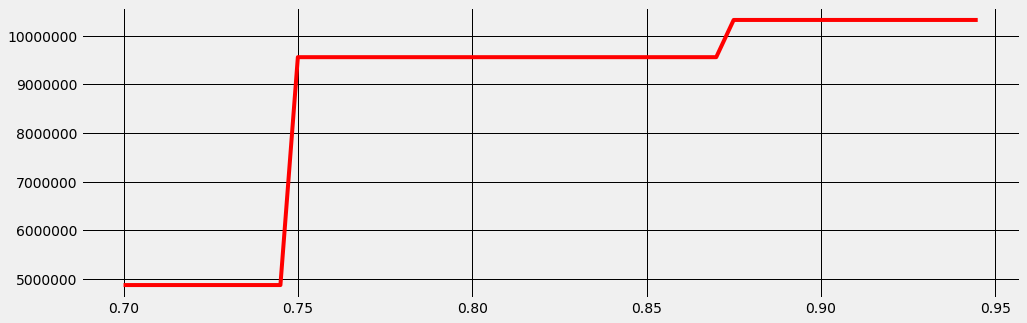

In [81]:
plt.figure(figsize=(15,5))
plt.plot(ratio_rmse.ratio, ratio_rmse.rmse, color="red")
plt.grid(True, color="black")
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [82]:
train = data[:int(0.70*(len(data)))]
valid = data[int(0.70*(len(data))):]

In [83]:
model = VAR(endog=train)
model_fit = model.fit()

In [84]:
yhat= model_fit.forecast(model_fit.y, steps=len(valid))

In [85]:
yhat

array([[ 5476899.49650115,  5476901.25099571],
       [11905548.2191574 , 11905547.05177696],
       [  -19034.5074051 ,   -19030.28806679]])

In [86]:
def converter(pick):
    out=[]
    for i in pick:
        out.append(np.mean(i))
    return pd.Series(out)

In [87]:
train=converter(train)
valid=converter(valid)
pred=converter(yhat)

In [88]:
def val(valid):
    valid_df=pd.DataFrame()
    valid_df["Amount"]=valid
    valid_df["TransactionDate"]=ts[int(0.7*len(ts)):].index
    valid_df=valid_df.set_index("TransactionDate")
    valid_df=valid_df["Amount"]
    return valid_df

In [89]:
valid_df=val(valid)

In [90]:
def trai(train):
    train_df=pd.DataFrame()
    train_df["Amount"]=train
    train_df["TransactionDate"]=ts[:int(0.7*len(ts))].index
    train_df=train_df.set_index("TransactionDate")
    train_df=train_df["Amount"]
    return train_df
train_df=trai(train)

In [91]:
def pr(pred):
    pred_df=pd.DataFrame()
    pred_df["Amount"]=pred
    pred_df["TransactionDate"]=ts[int(0.7*len(ts)):].index
    pred_df=pred_df.set_index("TransactionDate")
    pred_df=pred_df["Amount"]
    return pred_df
pred_df=pr(pred)

In [92]:
pred_df=pred_fin(pred_df, train_df)
valid_df=pred_fin(valid_df, train_df)

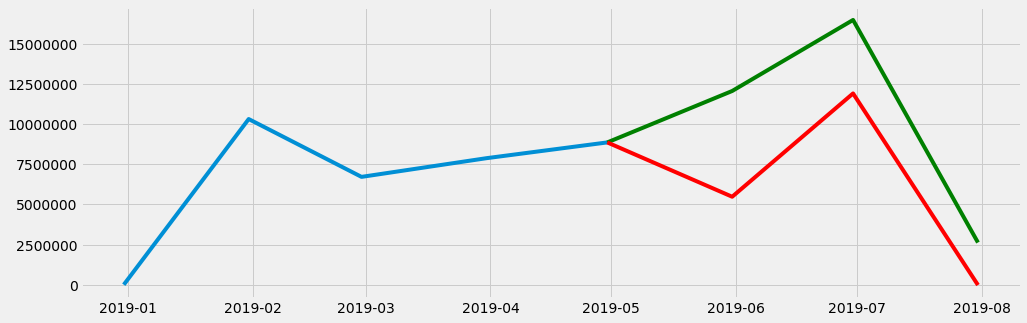

In [93]:
plt.figure(figsize=(15,5))
plt.plot(train_df)
plt.plot(valid_df, color="green")
plt.plot(pred_df, color="red")
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

<font color="red"> **VARMAX MODEL FOR SELLER 11 FROM SELLS RECEIPT DATA**</font>

**Below is the data preparation for seller 11 from sells receipt data.**

In [94]:
data=sales_fin[sales_fin["SellerId"]==11][["TransactionDate","Amount"]]
data=data.set_index("TransactionDate")
data=data.groupby(pd.Grouper(freq="M")).sum()
ts=data["Amount"]
ts=ts.apply(lambda x: int(x))

In [95]:
len(ts)

8

In [96]:
ts.tail()

TransactionDate
2019-03-31     7875584
2019-04-30     8857634
2019-05-31    12058584
2019-06-30    16479200
2019-07-31     2627300
Freq: M, Name: Amount, dtype: int64

**Importing the requisite libraries for VARMAX model**

In [97]:
from statsmodels.tsa.statespace.varmax import VARMAX
import random
random.seed(0)

**Creating the dataset in the format needed for the model.**

In [98]:
data = list()
for i in ts:
    v1 = i+random.random()
    v2 = v1 + random.random()
    row = [v1, v2]
    data.append(row)
    data_exog = [i + random.random() for i in ts]

**Here is the dataset**

In [99]:
data

[[2500.844421851525, 2501.6023762544655],
 [10311450.908112885, 10311451.412799742],
 [6713150.3101475695, 6713151.039979318],
 [7875584.477009777, 7875585.342319705],
 [8857634.001142818, 8857634.494720684],
 [12058584.803179469, 12058585.25114904],
 [16479200.814466864, 16479201.354750471],
 [2627300.1893913285, 2627300.376120857]]

**Applying the VARMAX model with order 1 of autoregression**

In [100]:
model = VARMAX(data, exog=data_exog, order=(1, 0))
model_fit = model.fit(disp=False)

**Predicting the outcome for coming 6 months.**

In [101]:
pred=model_fit.predict(steps=6)

**Converting the outcome into a series.**

In [102]:
model_fit.aic

97949199.26838478

In [103]:
out=[]
for i in pred:
    out.append(np.mean(i))
out=pd.Series(out)

**Making of dataframe of the outcome in the correct format.**

In [104]:
ind=pd.date_range("2019-08-30", "2019-12-31", freq="M")
prediction=pd.DataFrame()
prediction["TransactionDate"]=ind
prediction["Amount"]=out
prediction=prediction.set_index("TransactionDate")
prediction=prediction["Amount"]

**Below is the connection of prediction with the time series at last index of time series.**

In [105]:
pred_final=pred_fin(prediction, ts)

**Below plot is showing the forecast for seller 11 from invoices data using the VARMAX model.**

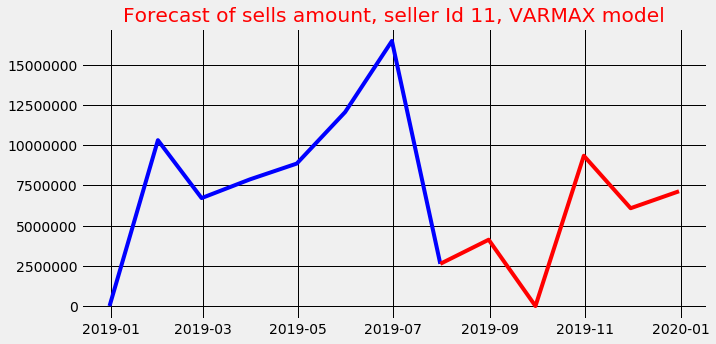

In [106]:
plt.figure(figsize=(10,5))
plt.plot(ts,color="blue")
plt.plot(pred_final, color="red")
plt.title("Forecast of sells amount, seller Id 11, VARMAX model", color="red")
plt.grid(True, color="black")
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

<font color="red"> **VARMAX MODEL FOR SELLER 2 FROM INVOICE DATA**</font>

In [107]:
data=invoice_fin[invoice_fin["SellerId"]==2][["TransactionDate","Trans_amount"]]
data=data.set_index("TransactionDate")
data=data.groupby(pd.Grouper(freq="M")).sum()
ts=data["Trans_amount"]
ts=ts.apply(lambda x: int(x))
ts=ts[:-1]

In [108]:
len(ts)

42

In [109]:
from statsmodels.tsa.stattools import adfuller
def dft(ts):
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test_stats','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return(dfoutput)

In [110]:
dft(ts)

Test_stats                     -3.545249
p-value                         0.006898
#Lags Used                      3.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64

In [111]:
ts.tail()

TransactionDate
2019-02-28     6672950
2019-03-31    11059775
2019-04-30     7363200
2019-05-31    16733469
2019-06-30    13965581
Freq: M, Name: Trans_amount, dtype: int64

In [112]:
from statsmodels.tsa.statespace.varmax import VARMAX
import random
random.seed(1)

In [113]:
data = list()
for i in ts:
    v1 = i+random.random()
    v2 = v1 + random.random()
    v3=v2+random.random()
    row = [v1, v2,v3]
    data.append(row)
    data_exog = [i + random.random() for i in ts]

In [114]:
model = VARMAX(data, exog=data_exog, order=(1, 0))
model_fit = model.fit(disp=False)

In [115]:
model_fit.aic

3239344142.6586823

In [116]:
model_fit.bic

3239344179.1497445

In [117]:
pred=model_fit.predict(steps=6)

In [118]:
out=[]
for i in pred:
    out.append(np.mean(i))
out=pd.Series(out)

In [119]:
ts.tail()

TransactionDate
2019-02-28     6672950
2019-03-31    11059775
2019-04-30     7363200
2019-05-31    16733469
2019-06-30    13965581
Freq: M, Name: Trans_amount, dtype: int64

In [120]:
ind=pd.date_range("2019-07-31", "2019-12-31", freq="M")
prediction=pd.DataFrame()
prediction["TransactionDate"]=ind
prediction["Amount"]=out
prediction=prediction.set_index("TransactionDate")
prediction=prediction["Amount"]

In [121]:
pred_final=pred_fin(prediction, ts)

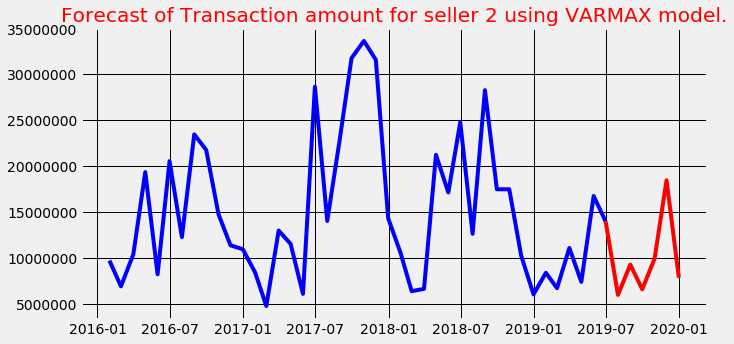

In [122]:
plt.figure(figsize=(10,5))
plt.plot(ts,color="blue")
plt.plot(pred_final, color="red")
plt.grid(True, color="black")
plt.title("Forecast of Transaction amount for seller 2 using VARMAX model.", color="red")
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()